In [2]:
library(dplyr)
library(ggplot2)
library(DOSE)
library(ggpubr)
library(wesanderson)
library(stringr)

In [6]:
path <- '../../Results/Li_2015/New/Individual chromosomes/Selected_marks.csv'

In [7]:
df <- read.csv(path)

In [8]:
beaf.na <- data.frame(X = rep(0, 2), 
                    Mark = rep('BEAF-32', 2), 
                    Gamma = rep(NA, 2), 
                    Amplitude = rep(NA, 2), 
                    Replicate = c('Rep. 1', 'Rep. 3'), 
                    Chr = rep('chr2L (23,513,712 bp)', 2))

chromator.na <- data.frame(X = rep(0, 1), 
                    Mark = rep('Chromator', 1), 
                    Gamma = rep(NA, 1), 
                    Amplitude = rep(NA, 1), 
                    Replicate = c('Rep. 3'), 
                    Chr = rep('chr2L (23,513,712 bp)', 1))

caph2.na <- data.frame(X = rep(0, 1), 
                    Mark = rep('CapH2', 1), 
                    Gamma = rep(NA, 1), 
                    Amplitude = rep(NA, 1), 
                    Replicate = c('Rep. 3'), 
                    Chr = rep('chr2L (23,513,712 bp)', 1))

rnapii.na <- data.frame(X = rep(0, 2), 
                    Mark = rep('RNAPII', 2), 
                    Gamma = rep(NA, 2), 
                    Amplitude = rep(NA, 2), 
                    Replicate = c('Rep. 2', 'Rep. 3'), 
                    Chr = rep('chr2L (23,513,712 bp)', 2))

h3k4me3.na <- data.frame(X = rep(0, 2), 
                    Mark = rep('H3K4me3', 2), 
                    Gamma = rep(NA, 2), 
                    Amplitude = rep(NA, 2), 
                    Replicate = c('Rep. 1', 'Rep. 3'), 
                    Chr = rep('chr2L (23,513,712 bp)', 2))

In [9]:
df <- df %>% 
    mutate(Replicate = str_replace(Replicate, "Rep1", "Rep. 1")) %>%
    mutate(Replicate = str_replace(Replicate, "Rep2", "Rep. 2")) %>%
    mutate(Replicate = str_replace(Replicate, "Rep3", "Rep. 3")) %>%
    mutate(Chr = str_replace(Chr, "chr2L", "chr2L (23,513,712 bp)")) %>%
    mutate(Chr = str_replace(Chr, "chr2R", "chr2R (25,286,936 bp)")) %>%
    mutate(Chr = str_replace(Chr, "chr3L", "chr3L (28,110,227 bp)")) %>%
    mutate(Chr = str_replace(Chr, "chr3R", "chr3R (32,079,331 bp)")) %>%
    mutate(Chr = str_replace(Chr, "chrX", "chrX (23,542,271 bp)"))

In [11]:
beaf32 <- ggplot(data=rbind(filter(df, Mark %in% "BEAF-32"), beaf.na), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("BEAF-32")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab("")+theme_dose(17)+ylab(expression(Delta*"h"[max]*" amplitude"))+xlim(1,4)+ylim(-0.5,2)+
    theme(legend.title = element_text(size=1), legend.text = element_text(size=11))

chromator <- ggplot(data=rbind(filter(df, Mark %in% "Chromator"), chromator.na), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("Chromator")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab("")+theme_dose(17)+ylab(NULL)+xlim(1,4)+ylim(-0.5,2)

h3k4me3 <- ggplot(data=rbind(filter(df, Mark %in% "H3K4me3"), h3k4me3.na), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("H3K4me3")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab("")+theme_dose(17)+ylab(NULL)+xlim(1,4)+ylim(-0.5,2)

rnapii <- ggplot(data=rbind(filter(df, Mark %in% "RNAPII"), rnapii.na), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("RNAPII")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab(expression("Optimal "*gamma))+theme_dose(17)+ylab(expression(Delta*"h"[max]*" amplitude"))+xlim(1,4)+ylim(-0.5,2)

caph2 <- ggplot(data=rbind(filter(df, Mark %in% "CapH2"), caph2.na), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("CapH2")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab(expression("Optimal "*gamma))+theme_dose(17)+ylab(NULL)+xlim(1,4)+ylim(-0.5,2)

cbp <- ggplot(data=filter(df, Mark %in% "CBP"), aes(x = Gamma, y = Amplitude)) +
    geom_point(aes(color = Chr, shape = Replicate), size = 3)+ggtitle("CBP")+
    scale_color_manual(values=wes_palette("IsleofDogs1")[c(4,1,2,3,5,6)])+
    xlab(expression("Optimal "*gamma))+theme_dose(17)+ylab(NULL)+xlim(1,4)+ylim(-0.5,2)

In [14]:
figure <- ggarrange(beaf32, chromator, h3k4me3, rnapii, caph2, cbp,  
                    common.legend = T, legend = 'bottom', 
                    ncol = 3, nrow = 2,               
                    font.label = list(size = 15, color = "black", face = "plain", family = NULL))

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


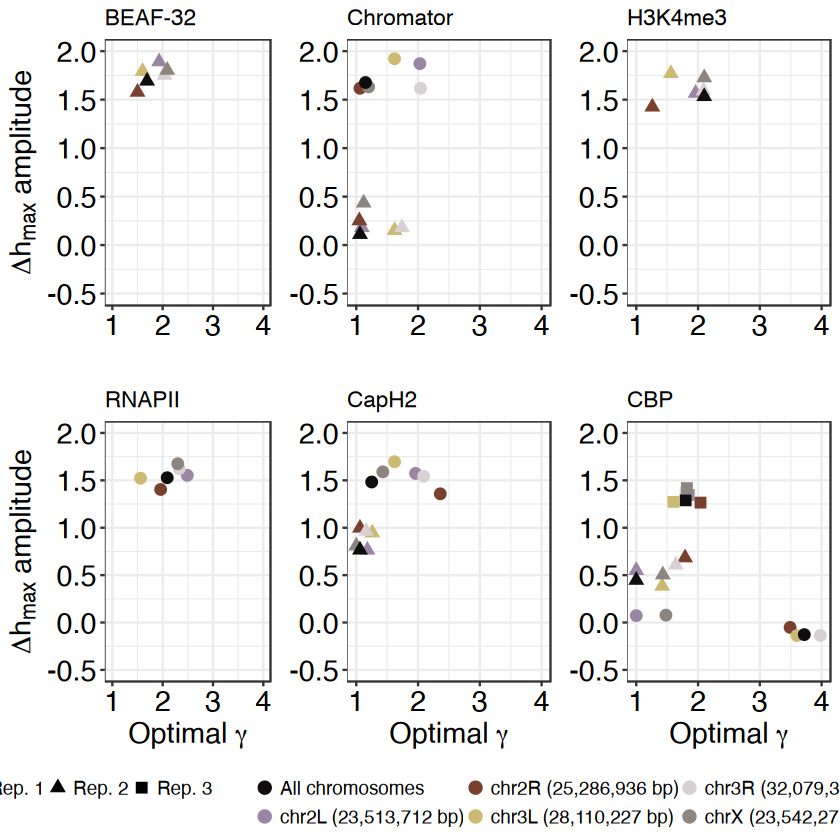

In [15]:
figure